# Splošni podatki

V raziskavi je sodelovalo 10 ljudi med njimi je bilo devet moških in ena ženska. Povprečna starost udeležencev je 30 let. 

Vsak si je aplikacijo predhodno namestil tako, da sem mu poslal .apk datoteko. Po namestitvi aplikacije se prikaže vodič, ki uporabniku razloži, kako aplikacijo uporabljati. 

Cilj diplomske naloge je izdelati aplikacijo, ki prilagaja način pregleda novic oz. videz aplikacije glede na kontekst. 

#### Za kontekst smo izbrali naslednje parametre:

* Fizična aktivnost uporabnika (lahko zavzema vrednosti STILL, ON_FOOT, IN_VEHICLE)
* Svetlost okolice merjena v lux-ih
* Svetlost zaslona (lahko zavzema celoštevilske vrednosti med 0 in 255)
* Čas oz. ura, kdaj uporabnik aplikacijo uporablja
* Hitrost internetne povezave (lahko zavzema celoštevilske vrednosti 0, 1, 2)
* Nivo baterije (celoštevilske vrednosti med 0 in 100)


#### Izhodi aplikacije, ki jih bomo prilagajali pa so:

* Razporeditev elementov (angl layout), ki vpliva predvsem na pregled novic. Ločimo 4 različne poglede
* Prikaz slik (uporabnik vklopi ali pa izklopi prikaz slik)
* Tema aplikacije (uporabnik lahko izbira med svetlo in temno temo aplikacije)
* Velikost pisave (uporabnik lahko izbira med veliko in majhno pisavo)


#### Način zbiranja podatkov:

1. Uporabniku prikažemo pogled novic z naključno izbranimi vrednostmi, ki so bile opisane v predhodnem razdelku (izhodi aplikacije)
2. Po dvajsetih sekundah (če uporabnik pogleda ne spreminja, ne zapusti aplikacije ali izklopi telefona) prikažemo vprašalnik, katerega namen je pridobiti informacije o trenutni zadovoljivosti prikaza novic.
3. Če uporabnik spremeni katerikoli parameter izhoda aplikacije, potem se časovnik, ki nadzira prikaz vprašalnika, ponastavi. 
4. Ko uporabnik izpolni vprašalnik, se podatki pošljejo na strežnik.


Število vnosov trenutno znaša 836.

# Porazdelitev posameznih ocen

Rezultati raziskave so bili pridobljeni s pomočjo vprašalnika, ki se je pojavil po dvajsetih sekundah uporabe istega pogleda (kar pomeni, da uporabnik v omenjenem časovnem okvirju ni spremenil velikosti pisave, vklopil ali izklopil prikaz slik, spremenil postavitev elementov oz. način navigacije po aplikaciji ali pa spremenil temo aplikacije). 

#### Vprašalnik je bil sestavljen iz treh kategorij:

1. Splošna ocena pogleda glede na stališče uporabnika (ali je uporabniku prikaz v splošnem všeč ali ne)
2. Berljivost pogleda (ali se uporabniku zdi pogled tekoče berljiv)
3. Informativnost pogleda (ali s pomočjo trenutnega pogleda v aplikaciji lahko uporabnik dovolj hitro bere novice oz. ima dober pregled nad prikazanimi novicami)

Vsako trditev uporabnik oceni s pomočjo Likertove lestvice, ki zavzema naslednje vrednosti:

* Nikakor se ne strinjam (z oceno -2)
* Ne strinjam se (z oceno -1)
* Niti-niti (z oceno 0)
* Strinjam se (z oceno 1)
* Popolnoma se strinjam (z oceno 2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pingouin as pg
from scipy import stats
from dython import nominal

In [2]:
def izrisi_ocene(df, column_name):
    values = df[column_name]
    ocene, counts = np.unique(values, return_counts=True)
    print("Vrednosti ocen ",ocene)
    print("Stevilo zbranih vnosov ", counts)
    x_pos = [i for i in range(5)]
    plt.bar(x_pos, counts)

    plt.xlabel("Uporabnikove ocene")
    plt.ylabel("Stevilo zbranih vnosov")
    plt.title(column_name)

    plt.xticks(x_pos, ocene)

    plt.show()

Spodnji histogrami predstavljajo porazdelitve posameznih ocen uporabnikov (glede na zgoraj omenjene kategorije). 

Iz oblike posameznih grafov oz. histogramov lahko vidimo, da so se uporabniki večinoma odločili dajati podobne ocene za posamezno kategorijo.

Vrednosti ocen  [-2 -1  0  1  2]
Stevilo zbranih vnosov  [113  59  58 233 373]


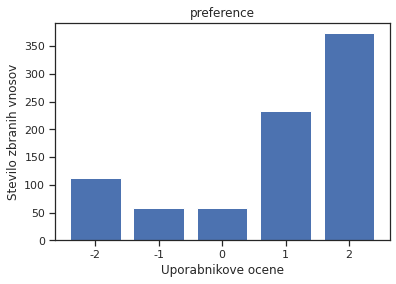

Vrednosti ocen  [-2 -1  0  1  2]
Stevilo zbranih vnosov  [114  44  68 224 386]


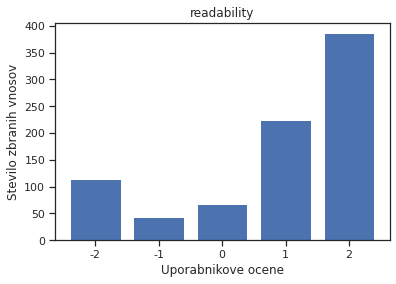

Vrednosti ocen  [-2 -1  0  1  2]
Stevilo zbranih vnosov  [111  54  58 216 397]


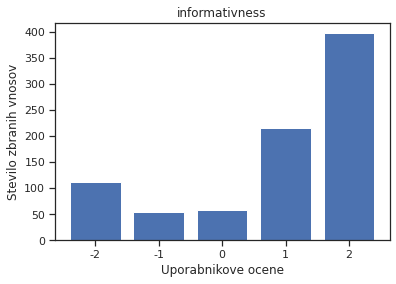

In [3]:
column_names = ['user activity', 'env brightness', 'screen brightness',
                'time of day', 'internet speed', 'battery level',
                'images', 'theme', 'layout', 'font size', 'preference', 
                'readability', 'informativness']

data_frame = pd.read_csv("Dataset/data.csv", header=None, names=column_names)

izrisi_ocene(data_frame, 'preference')
izrisi_ocene(data_frame, 'readability')
izrisi_ocene(data_frame, 'informativness')

In [4]:
data_frame['score'] = data_frame['preference'] + data_frame['readability'] + data_frame['informativness']

In [5]:
data_frame.head()

,user activity,env brightness,screen brightness,time of day,internet speed,battery level,images,theme,layout,font size,preference,readability,informativness,score
0,STILL,5,79,17,2,93,withImages,dark-theme,largeCards,small-font,1,1,1,3
1,STILL,5,79,17,2,93,withImages,dark-theme,largeCards,small-font,1,1,1,3
2,STILL,5,79,17,2,93,withImages,dark-theme,gridView,small-font,1,2,1,4
3,STILL,5,79,17,2,92,withImages,dark-theme,gridView,small-font,2,2,1,5
4,STILL,5,79,17,2,92,withImages,dark-theme,largeCards,large-font,1,2,1,4


Pregled nekaj vrednosti vhodnih podatkov (stolpec 'score' predstavlja sešteto vsoto posameznih ocen uporabnika po kategorijah). Glede na to, da uporabniki niso razlikovali med posameznimi kategorijami (za vsako kategorijo so večinoma dajali isto oceno), se lahko osredotočimo le na skupno oceno. Ta torej zavezame celoštevilske vrednosti med -6 in 6. 

Iz spodnjega histograma in frekvenc pojavitev najbolj pogostih ocen lahko opazimo, da so uporabniki večinoma izgled aplikacije pozitivno ocenjevali. Prav tako pa so trenuten prikaz pogosto ocenili kot najbolj neprimeren in so bolj redko bili pri tem neodločni (ocena -6 ima visoko frekvenco pojavitve, kar pomeni, da ko jim pogled ni bil všeč so vse kategorije ocenili kot najbolj neprimerne).

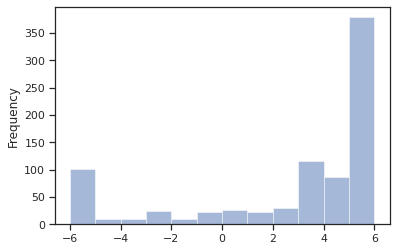

In [6]:
data_frame['score'].plot.hist(bins=12, alpha=0.5)

In [7]:
print("Vrednosti frekvenc petih najbolj pogostih ocen")
print(data_frame["score"].value_counts().head())
print("Mediana = ", data_frame["score"].median())
Q1 = data_frame["score"].quantile(0.25)
Q3 = data_frame["score"].quantile(0.75)
print("Q1 = ",Q1, " Q3 = ",Q3)
IQR = Q3 - Q1
print("Interquantile range ", IQR)
print("Average: ",data_frame["score"].mean())
print("Standard deviation: ", data_frame["score"].std())
print("Variance = ",data_frame["score"].std()**2)

Vrednosti frekvenc petih najbolj pogostih ocen
 6    287
 3    116
-6    101
 5     92
 4     87
Name: score, dtype: int64
Mediana =  4.0
Q1 =  1.0  Q3 =  6.0
Interquantile range  5.0
Average:  2.574162679425837
Standard deviation:  4.093283810334537
Variance =  16.754972351946826


# Analiza vrednosti izhodov aplikacije (tema, 'layout', velikost pisave, prisotnost slik)


Spodnja analiza prikazuje porazdelitev posameznih vrednosti izhodov sistema. 

Najprej je prikazan delež vseh vnosov glede na posamezno vrednost v celotni zbirki podatkov. Temu sledi prikaz ocen izhodov glede na ocene posameznih kategorij uporabnikov v povezavi z določenim izhodom aplikacije.

Kot bomo videli v nadaljevanju, kjer bomo izvedli analizo variance, ne moremo izvesti klasičnega parametričnega [ANOVA testa](https://en.wikipedia.org/wiki/Analysis_of_variance), saj omenjeno metodo lahko izvajamo le pod sledečimi pogoji:

* Za podatke velja, da izhajajo iz normalne porazdelitve
* Za podatke velja homogenost variance

Prvi pogoj o normalni porazdelitvi lahko kršimo ob predpostavki, da imamo dovolj velik vzorec (kar v našem primeru imamo). [Simulacije](https://support.minitab.com/en-us/minitab/18/Assistant_One_Way_ANOVA.pdf) so namreč pokazale, da test lahko izvajamo ob pogoju, da imamo 2-9 različnih skupin, ki imajo vsaj 15 vzorcev, vendar pa ne smemo zanemarjati tudi pogoja o homogenosti variance (v našem primeru skupine po katerih grupiramo ocene na podlagi [Levene testa](https://en.wikipedia.org/wiki/Levene%27s_test) dobimo p vrednost manjso kot 0.05, kar pomeni, da variance niso homogene).

Alternativa ANOVA testa pa je [Welcherjev anova test](https://en.wikipedia.org/wiki/Welch%27s_t-test), ki ne zahteva homogonosti variance posameznih skupin, zato ga bomo tudi uporabili.

Pogosto pa se tudi pojavi vprašanje ali je smiselno izvajati ANOVA teste, če podatki niso normalno porazdeljeni, ne velja homogenost variance in če napovedujemo izhode, ki so zgrajeni na podlagi Likertove lestvice. Problem Likertove lestvice je, da nemoremo z gotovostjo trditi da gre za intervalno spremenljivko (lahko jih uredimo po velikosti, ampak ni jasen način izračuna razdalje med posameznimi vrednostimi). V [članku](https://www.researchgate.net/publication/41420484_LIkert_scales_levels_of_measurement_adn_the_laws_of_statistics) se izkaže, da je ANOVA analiza robustna, kljub temu da imamo manjše velikosti vzorcev, z nehomogeno varianco in ne-normalno porazdelitvijo. 

## Bonferroni-jev popravek

Glede na to da bomo v nadaljevanju izvedli 17 statističnih testov nad istimi podatki, lahko pride do napačnih sklepov. Zgodi se lahko, da naredimo napako prvega tipa, kar pomeni, da zavržemo veljavno ničelno hipotezo. 

Če vzamemo standardno vrednost α=0.05, potem skupno verjetnost napake prvega tipa v našem primeru znaša: 1 - (1 - 0.05)^17 = 0.582. Zmanjšati je torej potrebno člen 0.05 v enačbi.

Problem lahko rešimo s pomočjo [Bonferroni-jevega popravka](https://en.wikipedia.org/wiki/Bonferroni_correction), pri čemer delimo p-vrednost s številom testom, ki jih izvajamo. 

V našem primeru bo nova vrednost α=0.05/17 = 0.0029.

## 1) Porazdelitev vrednosti za temo aplikacije

Iz grafov lahko ugotovimo, da so vrednosti za temo aplikacije približno enakomerno razporejene. Možno je bilo tudi razbrati, da je s pozitivnimi ocenami kategorij bila tema (svetla in temna) enakomerno porazdeljena. Razlika nastane predvsem pri negativno označenih vrednostih, kjer je moč opaziti, da ima temen prikaz novic več vnosov.

Oblika spodnjih histogramov nam prikazuje, da so uporabniki vse tri kategorije ocenjevali večinoma z enako vrednostjo. 

Glede na to, da se vrednosti za temo aplikacije približno enako pogosto pojavljajo to pomeni, da so uporabniki teme redko menjavali.

In [31]:
def draw_pie(labels, sizes):
    plt.pie(sizes, labels=labels,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()

light counter =  392
dark counter =  444


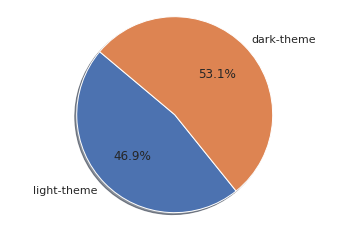

In [32]:
c_light = sum(x == "light-theme" for x in data_frame["theme"])
c_dark = sum(x == "dark-theme" for x in data_frame["theme"])

print('light counter = ',c_light)
print('dark counter = ',c_dark)

draw_pie(['light-theme', 'dark-theme'], [c_light, c_dark])

In [33]:
def draw_hist(f_name, output_labels, df):   

    categories = ['preference', 'readability', 'informativness']
    ocene = [-2,-1,0,1,2]
    for category in categories:
        index = np.arange(5)
        bar_width = 0.15 
        fig, ax = plt.subplots()
        for i, label in enumerate(output_labels):
            data = []
            for ocena in ocene:
                data.append(len(df.loc[(df[category] == ocena)  & (df[f_name] == label)]))
            print("Za label ", label, "v kategoriji", category, "je porazdelitev podatkov sledeca", data)
            ax.bar(index+i*bar_width, data, bar_width, label=label)
        ax.set_xlabel('Ocene')
        ax.set_ylabel('Stevilo vnosov')
        ax.set_title('Porazdelitev vrednosti za '+f_name+', glede na '+category)
        ax.set_xticks(index + bar_width / len(output_labels))
        ax.set_xticklabels(ocene)
        ax.legend()
        plt.show()

### Porazdelitev vrednosti za temo aplikacije po oceni posamezne kategorije

Za label  light-theme v kategoriji preference je porazdelitev podatkov sledeca [34, 22, 32, 112, 192]
Za label  dark-theme v kategoriji preference je porazdelitev podatkov sledeca [79, 37, 26, 121, 181]


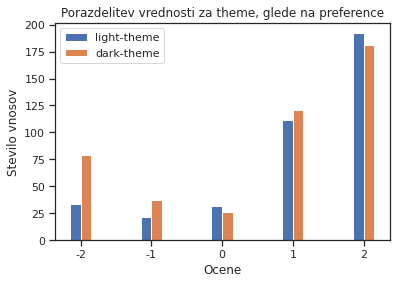

Za label  light-theme v kategoriji readability je porazdelitev podatkov sledeca [34, 19, 33, 107, 199]
Za label  dark-theme v kategoriji readability je porazdelitev podatkov sledeca [80, 25, 35, 117, 187]


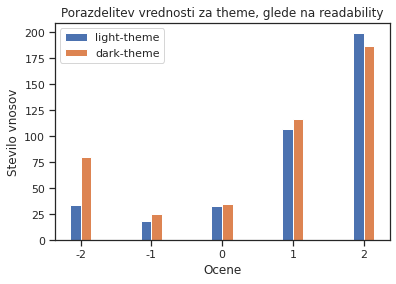

Za label  light-theme v kategoriji informativness je porazdelitev podatkov sledeca [35, 22, 28, 105, 202]
Za label  dark-theme v kategoriji informativness je porazdelitev podatkov sledeca [76, 32, 30, 111, 195]


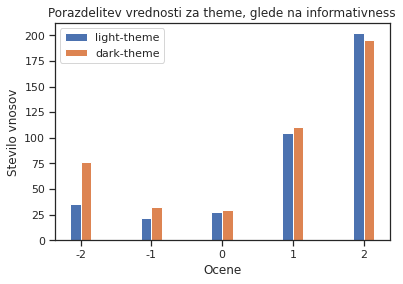

In [34]:
draw_hist('theme', ['light-theme', 'dark-theme'], data_frame)

Na spodnji sliki lahko tudi opazimo, da je v splošnem bila svetla tema aplikacija bolj priljubljena in da ima manj ekstremnih vrednosti, ki odstopajo (angl. outliers). Prav tako pa ne smemo zanemariti temnega pogleda, saj tudi ta v določenih trenutkih pridobiva visoke ocene.

Če v jeziku R poskusimo napovedovati vrednosti izhoda sistema (skupaj seštete ocene posameznih kategorij) na sledeč način:

1.  model = lm(score ~ theme, data=dat)
2. summary(model)

dobimo p vrednost, ki znaša 8.09e-05 *** , kar pomeni, da moramo zavreči ničelno hipotezo. Torej lahko sklepamo, da tema vpliva na skupno oceno uporabnika.

![title](img/tema-ocena.png)

In [35]:
def perform_anova_test(feature_name, feature_values):
    data_frames = []
    
    for feature_value in feature_values:
        data_frames.append(data_frame.loc[data_frame[feature_name] == feature_value]['score'])
        
    alpha = 0.05/17
    
    levene_test_statistics, pvalue = stats.levene(*data_frames)
    print("Rezultati Levene testa:\n")
    print("===================================")
    print("Statistics = ",levene_test_statistics)
    print("p-value",pvalue)
    print("===================================\n")
    
    if pvalue < alpha:
        print("Variance podanih distribucij so nehomogene, zato izvajamo Welch anova test\n")
        result = pg.welch_anova(data=data_frame, dv="score", between=feature_name)
        p = result['p-unc'][0]
        print("rezultati Welch anova testa\n")
        print("==============================================")
        print(result)
        print("==============================================\n")

        if p < alpha:
            print("Povprečja posameznih skupin so različna")
        else:
            print("Povprečja posameznih skupin so enaka")
    else:
        print("Variance podanih distribucij so homogene, zato izvajamo ANOVA test\n")
        s, p = stats.f_oneway(*data_frames)
        print("==============================================")
        print("Statistics = ",s)
        print("p-value = ",p)
        print("==============================================\n")
        if p < alpha:
            print("Povprečja posameznih skupin so različna")
        else:
            print("Povprečja posameznih skupin so enaka")


In [36]:
perform_anova_test('theme', ['light-theme', 'dark-theme'])

Rezultati Levene testa:

Statistics =  14.685471923158612
p-value 0.00013656377954878994

Variance podanih distribucij so nehomogene, zato izvajamo Welch anova test

rezultati Welch anova testa

  Source  ddof1    ddof2       F     p-unc
0  theme      1  829.924  16.074  0.000066

Povprečja posameznih skupin so različna


Iz zgornjega izpisa lahko opazimo, da na končno oceno uporabnika vpliva tema aplikacije, saj obstaja statistično relevantna razlika (p vrednodst Welch anova testa znaša 0.000066) v povprečni oceni posameznih skupin (ocene za temno in svetlo temo aplikacije) .

### Porazdelitev vrednosti za velikost pisave

Iz grafov je bilo možno ugotoviti, da so vrednosti za velikost pisave približno enakomerno razporejene. Možno je bilo tudi razbrati, da je velika pisava imela več pozitivnih ocen kot manjša. Prav tako pa so uporabniki enako ocenjevali vrednosti posameznih kategorij. Približno enaka porazdelitev (frekvence pojava) pisave pa tudi nakazuje na to, da uporabniki pisave večinoma niso menjavali.

large font counter =  425
small font counter =  411


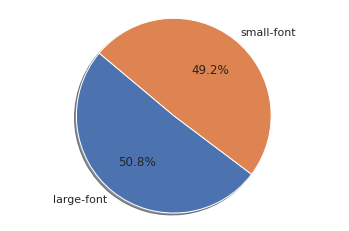

In [37]:
c_large = sum(x == "large-font" for x in data_frame["font size"])
c_small = sum(x == "small-font" for x in data_frame["font size"])

print('large font counter = ',c_large)
print('small font counter = ',c_small)

draw_pie(['large-font', 'small-font'], [c_large, c_small])

### Porazdelitev vrednosti za velikost pisave po oceni posamezne kategorije

Za label  small-font v kategoriji preference je porazdelitev podatkov sledeca [71, 36, 34, 122, 148]
Za label  large-font v kategoriji preference je porazdelitev podatkov sledeca [42, 23, 24, 111, 225]


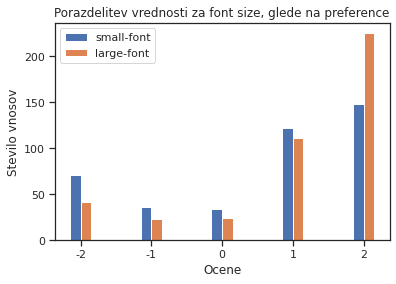

Za label  small-font v kategoriji readability je porazdelitev podatkov sledeca [72, 34, 45, 106, 154]
Za label  large-font v kategoriji readability je porazdelitev podatkov sledeca [42, 10, 23, 118, 232]


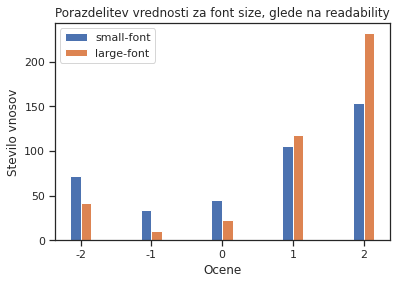

Za label  small-font v kategoriji informativness je porazdelitev podatkov sledeca [71, 31, 35, 110, 164]
Za label  large-font v kategoriji informativness je porazdelitev podatkov sledeca [40, 23, 23, 106, 233]


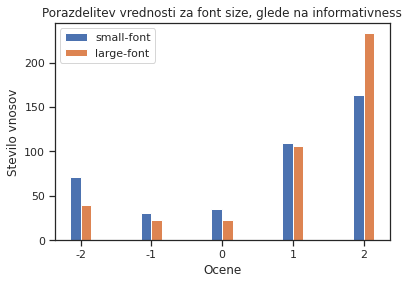

In [38]:
draw_hist('font size', ['small-font', 'large-font'], data_frame)

Na spodnji sliki lahko tudi opazimo, da je v splošnem velika pisava bolj priljubljena in da ima več ekstremnih vrednosti, ki odstopajo (angl. outliers). Prav tako pa ne smemo zanemariti majhne pisave, saj tudi ta v velikokrat dobi visoke ocene.

Če v jeziku R poskusimo napovedovati vrednosti izhoda sistema (skupaj seštete ocene posameznih kategorij) na sledeč način:

1. model = lm(output ~ font.size, data=dat)
2. summary(model)

dobimo p vrednost, ki znaša 6.69e-08 *** , kar pomeni, da moramo zavreči ničelno hipotezo. Torej lahko sklepamo, da velikost pisave vpliva na skupno oceno uporabnika.

![title](img/pisava-ocena.png)

In [39]:
perform_anova_test('font size', ['small-font', 'large-font'])

Rezultati Levene testa:

Statistics =  16.950708256167704
p-value 4.217939541780623e-05

Variance podanih distribucij so nehomogene, zato izvajamo Welch anova test

rezultati Welch anova testa

      Source  ddof1    ddof2      F         p-unc
0  font size      1  807.345  29.54  7.259891e-08

Povprečja posameznih skupin so različna


Iz zgornjega izpisa lahko opazimo, da na končno oceno uporabnika vpliva velikost pisave, saj obtaja statistično relevantna razlika (p vrednost Welch anova testa znaša 7.259891e-08) v povprečni oceni posameznih skupin (ocene za veliko in majhno pisavo)

## 3) Porazdelitev vrednosti za 'layout' oz. pogled prikaza novic

Iz spodnjega tortnega diagrama lahko opazimo, da so uporabniki velikokrat zamenjali način prikaza novic. Prav tako pa lahko iz histogramov opazimo, da ima 'largeCards' pogled največ pozitivnih ocen. Ponovno pa se izkaže (razvidno iz oblike histogramov), da so uporabniki enako označevali posamezne kategorije vprašalnika.  

largeCards layout =  378
gridView layout =  51
miniCards layout =  118
xLargeCards layout =  289


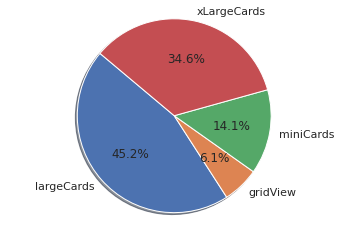

In [40]:
c0 = sum(x == "largeCards" for x in data_frame["layout"])
c1 = sum(x == "gridView" for x in data_frame["layout"])
c2 = sum(x == "miniCards" for x in data_frame["layout"])
c3 = sum(x == "xLargeCards" for x in data_frame["layout"])

print('largeCards layout = ',c0)
print('gridView layout = ',c1)
print('miniCards layout = ',c2)
print('xLargeCards layout = ',c3)

draw_pie(['largeCards', 'gridView', 'miniCards', 'xLargeCards'], [c0, c1, c2, c3])

### Porazdelitev vrednosti za 'layout' oz. pogleda prikaza novic glede na posamezno oceno kategorije

Za label  largeCards v kategoriji preference je porazdelitev podatkov sledeca [25, 22, 21, 99, 211]
Za label  gridView v kategoriji preference je porazdelitev podatkov sledeca [10, 8, 11, 15, 7]
Za label  miniCards v kategoriji preference je porazdelitev podatkov sledeca [12, 6, 9, 54, 37]
Za label  xLargeCards v kategoriji preference je porazdelitev podatkov sledeca [66, 23, 17, 65, 118]


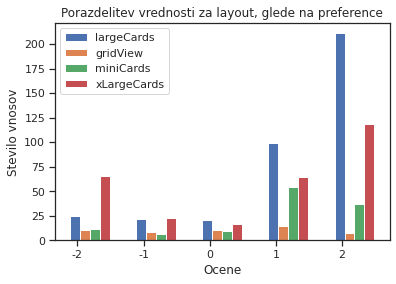

Za label  largeCards v kategoriji readability je porazdelitev podatkov sledeca [23, 17, 25, 95, 218]
Za label  gridView v kategoriji readability je porazdelitev podatkov sledeca [12, 8, 13, 11, 7]
Za label  miniCards v kategoriji readability je porazdelitev podatkov sledeca [12, 3, 15, 46, 42]
Za label  xLargeCards v kategoriji readability je porazdelitev podatkov sledeca [67, 16, 15, 72, 119]


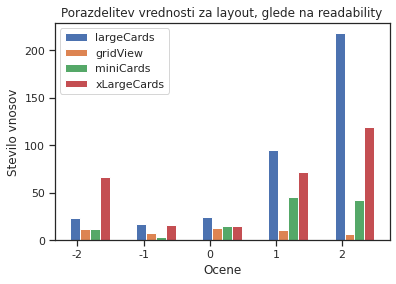

Za label  largeCards v kategoriji informativness je porazdelitev podatkov sledeca [23, 17, 22, 94, 222]
Za label  gridView v kategoriji informativness je porazdelitev podatkov sledeca [11, 7, 10, 14, 9]
Za label  miniCards v kategoriji informativness je porazdelitev podatkov sledeca [11, 7, 12, 41, 47]
Za label  xLargeCards v kategoriji informativness je porazdelitev podatkov sledeca [66, 23, 14, 67, 119]


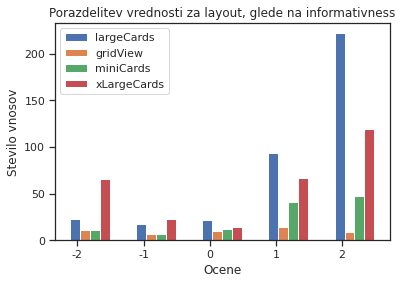

In [41]:
draw_hist('layout', ['largeCards', 'gridView', 'miniCards', 'xLargeCards'], data_frame)

Na spodnji sliki lahko tudi opazimo, da je v splošnem 'largeCards' pogled najbolj priljubljen in da ima tudi največ ekstremnih vrednosti, ki odstopajo (angl. outliers). Na tem mestu je potrebno omeniti, da razporeditev ni povsem pravična, saj moramo upoštevati dejstvo, da 'miniCards' pogled in 'gridView' ne obstajata, če slike niso prisotne. Hkrati pa za gridView velja, da ne more imeti velike pisave, saj je njegov namen uporabniku prikazati mrežo slik s kratkimi napisi. 

Če v jeziku R poskusimo napovedovati vrednosti izhoda sistema (skupaj seštete ocene posameznih kategorij) na sledeč način:

1. model = lm(score ~ layout, data=dat)
2. summary(model)

dobimo p vrednosti, za posamezen koeficient, ki so veliko manjše kot 0.0029, kar pomeni, da moramo zavreči ničelno hipotezo. Torej lahko sklepamo, da izbira prikaza novic oz. 'layout' vpliva na skupno oceno uporabnika.

![title](img/layout-ocena.png)

In [42]:
perform_anova_test('layout', ['largeCards', 'gridView', 'miniCards', 'xLargeCards'])

Rezultati Levene testa:

Statistics =  17.92722284293112
p-value 2.787989749818148e-11

Variance podanih distribucij so nehomogene, zato izvajamo Welch anova test

rezultati Welch anova testa

   Source  ddof1    ddof2       F         p-unc
0  layout      3  188.898  24.287  2.448976e-13

Povprečja posameznih skupin so različna


Iz zgornjega izpisa lahko opazimo, da na končno oceno uporabnika vpliva izbira pogleda prikaza novic, saj obstaja statistično relevantna razlika (p vrednost Welch anova testa znaša 2.448976e-13) v povprečni oceni posameznih skupin (ocene za posamezen način pogleda novic - vrednosti 'largeCards', 'gridView', 'miniCards', 'xLargeCards') .

## 4) Porazdelitev vrednosti za prisotnost slik

Na podlagi spodnjega tortnega diagrama lahko opazimo, da so uporabniki velikokrat preklapljali med vrednostimi za prikaz slik. Glede na to, da imamo kar 80.4% takih vnosov, kjer so slike prisotne, lahko sklepamo, da je uporabnikom prikaz novic bolj všeč, ko so te na voljo. 

Iz oblike histogramov pa lahko razberemo, da so ocene posameznih kategorij enake ne glede na prisotnost slik. Prav tako histogrami kažejo na večjo priljubnost prikazov novic, kjer slike so prisotne.

with images counter=  672
without images =  164


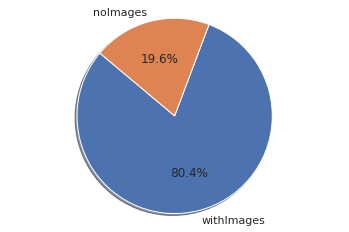

In [43]:
c0 = sum(x == "withImages" for x in data_frame["images"])
c1 = sum(x == "noImages" for x in data_frame["images"])

print('with images counter= ',c0)
print('without images = ',c1)

draw_pie(['withImages', 'noImages'], [c0, c1])

### Porazdelitev vrednosti za prisotnost slik glede na oceno posamezne kategorije

Za label  withImages v kategoriji preference je porazdelitev podatkov sledeca [53, 29, 45, 202, 343]
Za label  noImages v kategoriji preference je porazdelitev podatkov sledeca [60, 30, 13, 31, 30]


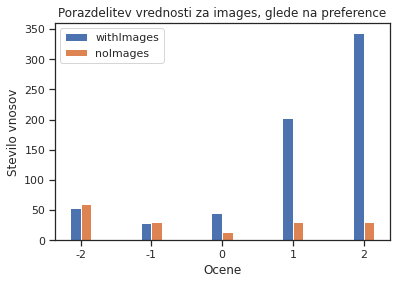

Za label  withImages v kategoriji readability je porazdelitev podatkov sledeca [56, 19, 55, 185, 357]
Za label  noImages v kategoriji readability je porazdelitev podatkov sledeca [58, 25, 13, 39, 29]


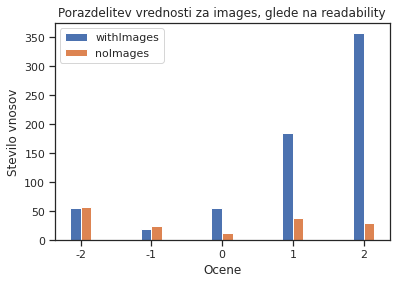

Za label  withImages v kategoriji informativness je porazdelitev podatkov sledeca [56, 27, 48, 178, 363]
Za label  noImages v kategoriji informativness je porazdelitev podatkov sledeca [55, 27, 10, 38, 34]


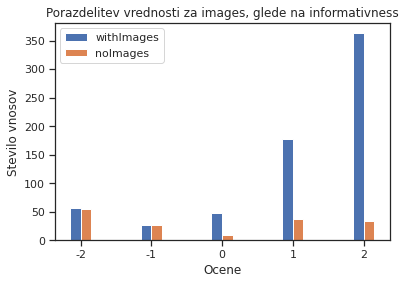

In [44]:
draw_hist('images', ['withImages', 'noImages'], data_frame)

Na spodnji sliki lahko tudi opazimo, da uporabniki niso bili zadovolnji s prikazom novic, ki ne vsebuje slik. Prav tako vidimo, da imamo nekaj ekstremnih vrednosti oz. odstopanj v povezavi, ko so slike prisotne. Na njih verjetno vpliva še kakšen drug parameter konteksta.

Če v jeziku R poskusimo napovedovati vrednosti izhoda sistema (skupaj seštete ocene posameznih kategorij) na sledeč način:

1. model = lm(score ~ images, data=dat)
2. summary(model)

dobimo p vrednost, ki znaša 2e-16 *** . To pomeni, da moramo zavreči ničelno hipotezo. Sklepamo torej lahko, da prisotnost slik vpliva na skupno oceno uporabnika.

![title](img/slike-ocena.png)

In [45]:
perform_anova_test('images', ['withImages', 'noImages'])

Rezultati Levene testa:

Statistics =  55.39196022199907
p-value 2.4599768464964364e-13

Variance podanih distribucij so nehomogene, zato izvajamo Welch anova test

rezultati Welch anova testa

   Source  ddof1    ddof2        F         p-unc
0  images      1  210.819  120.472  1.835333e-22

Povprečja posameznih skupin so različna


Iz zgornjega izpisa lahko opazimo, da na končno oceno uporabnika vpliva prisotnost slik, saj obstaja statistično relevantna razlika (p vrednost Welch anova testa znaša 1.835333e-22) v povprečni oceni posameznih skupin (pogledi s slikami in brez njih) .

##### Povezava med prisotnostjo slik in izbiro pogleda prikaza novic

Predhodno smo omenili, da priljubljenost posameznega pogleda ni prikazana v povezavi s prisotnostjo slik, za katero vemo, da ima velik vpliv (prikazi brez slik imajo zelo nizke ocene medtem ko s slikami visoke). Prav tako, če primerjamo oba modela (lineari model, ki napoveduje izhod sistema samo na podlagi prisotnosti slik in modela, ki upošteva prisotnost slik kot tudi izbro pogleda) opazimo, da imajo slike in pogled visok vpliv. 

Po primerjavi modelov s pomočjo funkcije anova opazimo, da je model, ki napoveduje uporabnikovo oceno na podlagi prisotnosti slik in pogleda boljši (p vrednost znaša < 2.2e-16 ***)

![title](img/layout-slike-ocena.png)
![title](img/no-img-layout-ocena.png)
![title](img/with-img-layout-ocena.png)

# Porazdelitev vrednosti parametrov konteksta

Spodnja analiza prikazuje porazdelitev števila vnosov glede na posamezne vrednosti konteksta (ura, fizična aktivnost uporabnika, svetlost okolice, svetlost zaslona, moč internetne povezave, nivo baterije)

#### Uporaba aplikacije glede na uro

Spodnji histogram prikazuje razporeditev uporabe aplikacije po urah (število vnosov glede na časovne intervale v dnevu, ko je uporabnik aplikacijo uporabljal). Rezultati so bili sledeči:

1. med 00:00h in 06:59h je bilo zbranih 134 vnosov
2. med 07:00h in 12:59h je bilo zbranih 213 vnosov
3. med 13:00h in 17:59h je bilo zbranih 356 vnosov
4. med 18:00h in 23:59h je bilo zbranih 133 vnosov

Od tod sledi, da je večina uporabnikov aplikacijo uporabljala popoldne med 13:00h in 17:59h.

In [46]:
def izrisi_ure(vals):
    print("Stevilo vnosov glede na casovne intervale ",vals)
    labels = ('00:00-06:59', '07:00-12:59','13:00-17:59', '18:00-23:59')
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, vals, align='center')
    plt.xticks(y_pos, labels)
    plt.ylabel('Stevilo vnosov')
    plt.title('Stevilo zbranih vnosov glede na ure')
    plt.show()

In [47]:
def ana_cont_var(var_name, b_plot=False):
    skew = data_frame[var_name].skew()
    kurt = data_frame[var_name].kurtosis()
    
    std = data_frame[var_name].std()
    variance = std**2
    
    modus = data_frame[var_name].mode()[0]
    mean = data_frame[var_name].mean()
    median = data_frame[var_name].median()
    
    minimum = data_frame[var_name].min()
    maximum = data_frame[var_name].max()
    r = abs(maximum - minimum)
    
    if b_plot:
        data_frame.boxplot(column=var_name)
        plt.show()
    
    print("Top frequencies\n")
    print("====================================")
    print(data_frame[var_name].value_counts().head())
    print("====================================\n")
    
    data_frame[var_name].plot.kde()
    plt.show()

    return {
        "skewness": skew,
        "kurtosis": kurt,
        "std": std,
        "variance": variance,
        "modus": modus,
        "mean": mean,
        "median": median,
        "minimum": minimum,
        "maximum": maximum,
        "range": r
    }

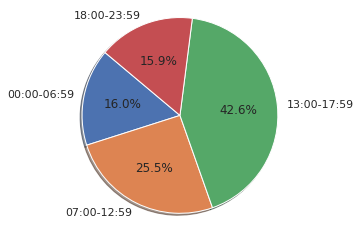

Stevilo vnosov glede na casovne intervale  [134, 213, 356, 133]


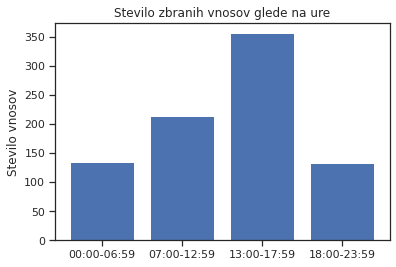

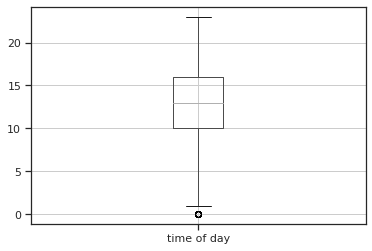

Top frequencies

10    102
16     95
13     77
17     66
14     62
Name: time of day, dtype: int64



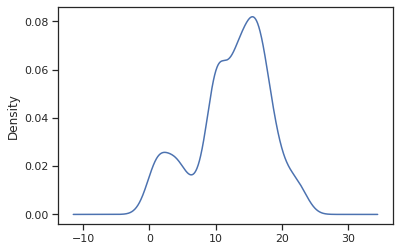

{'skewness': -0.5416308318938785,
 'kurtosis': -0.2869538766942097,
 'std': 5.496639011825716,
 'variance': 30.21304042632438,
 'modus': 10,
 'mean': 12.561004784688995,
 'median': 13.0,
 'minimum': 0,
 'maximum': 23,
 'range': 23}

In [48]:
c1 = sum(x>=0 and x<=6 for x in data_frame["time of day"])
c2 = sum(x>=7 and x<=12 for x in data_frame["time of day"])
c3 = sum(x>=13 and x<=17 for x in data_frame["time of day"])
c4 = sum(x>=18 and x<=23 for x in data_frame["time of day"])

draw_pie(['00:00-06:59', '07:00-12:59','13:00-17:59', '18:00-23:59'], [c1, c2, c3, c4])
izrisi_ure([c1, c2, c3, c4])

ana_cont_var("time of day", b_plot=True)

#### Uporaba aplikacija glede na fizično aktivnost uporabnika

Spodnji histogram prikazuje razporeditev uporabe glede na fizično aktivnost uporabnikov (število vnosov glede na posamezne aktivnosti uporabnika, ki so lahko označene STILL, ON_FOOT ali pa IN_VEHICLE). Rezultati so bili sledeči:

1. Zbranih je bilo 550 vnosov za stanje mirovanja uporabnika (vrednost STILL), kar ni presenetljivo, saj ljudje večinoma berejo novice, ko so pri miru.
2. Med hojo (vrednost ON_FOOT) uporabnikov je bilo zbranih 158 vnosov
3. Med vožnjo (vrednost IN_VEHICLE) je bilo zbranih 128 vnosov    

In [49]:
def izrisi_aktivnosti(vals):
    print(vals)
    labels = ('STILL', 'ON_FOOT','IN_VEHICLE')
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, vals, align='center')
    plt.xticks(y_pos, labels)
    plt.ylabel('Stevilo vnosov')
    plt.title('Stevilo zbranih vnosov glede na fizicno aktivnost uporabnika')
    plt.show()

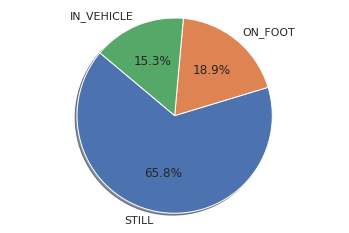

[550, 158, 128]


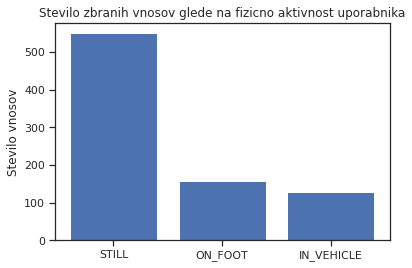

In [50]:
c0 = sum(x == "STILL" for x in data_frame["user activity"])
c1 = sum(x == "ON_FOOT"for x in data_frame["user activity"])
c2 = sum(x == "IN_VEHICLE" for x in data_frame["user activity"])

draw_pie(['STILL', 'ON_FOOT','IN_VEHICLE'], [c0, c1, c2])
izrisi_aktivnosti([c0,c1,c2])

In [51]:
perform_anova_test('user activity', ['STILL', 'ON_FOOT','IN_VEHICLE'])

Rezultati Levene testa:

Statistics =  55.419644704526455
p-value 2.5328209375034908e-23

Variance podanih distribucij so nehomogene, zato izvajamo Welch anova test

rezultati Welch anova testa

          Source  ddof1    ddof2        F         p-unc
0  user activity      2  216.602  147.452  3.830926e-41

Povprečja posameznih skupin so različna


Iz zgornjega izpisa lahko opazimo, da na končno oceno uporabnika vpliva fizična aktivnost uporabnika, saj obstaja statistično relevantna razlika (p vrednost Welch anova testa znaša 3.830926e-41) v povprečni oceni posameznih skupin (ocene uporabnikov grupirane po fizični aktivnosti) .

Na spodnji sliki lahko tudi opazimo, da so uporabniki večinoma negativne ocene dajali med vožnjo ali pa med hojo. Največji delež negativnih ocen se pojavi pri vožnji. Pri tem ne smemo pozabiti, da je takih vnosov najmanj in v bazi podatkov prevladujejo zapisi, ki imajo vrednost fizične aktivnosti enako 'STILL'.

Če v jeziku R poskusimo napovedovati vrednosti izhoda sistema (skupaj seštete ocene posameznih kategorij) na sledeč način:

1. model = lm(score ~ user.activity, data=data)
2. summary(model)

dobimo p vrednosti, ki so manjše kot kot 0.0029, kar pomeni, da moramo zavreči ničelno hipotezo. Torej lahko sklepamo, da fizična aktivnost uporabnika vpliva na skupno oceno prikaza novic.

![title](img/vpliv_fa_ocena.png)

#### Uporaba aplikacije glede svetlost okolice

Spodnji grafi prikazujejo porazdelitev vhodnih podatkov glede na svetlost okolice merjene v lux-ih. Intervale smo določili s pomočjo tabele, ki jo lahko najdete na [wikipedia](https://en.wikipedia.org/wiki/Lux).

Grafi prikazujejo, da so uporabniki večinoma aplikacijo uporabljali v temnih prostorih.

In [52]:
def izrisi_svetlost_okolice(vals):
    print("Stevilo vnosov glede na svetlost okolice ",vals)
    labels = ('0-20', '21-50','51-100', '101>=')
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, vals, align='center')
    plt.xticks(y_pos, labels)
    plt.ylabel('Stevilo vnosov')
    plt.title('Stevilo zbranih vnosov glede na svetlost okolice')
    plt.show()

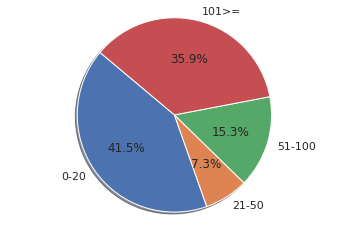

Stevilo vnosov glede na svetlost okolice  [347, 61, 128, 300]


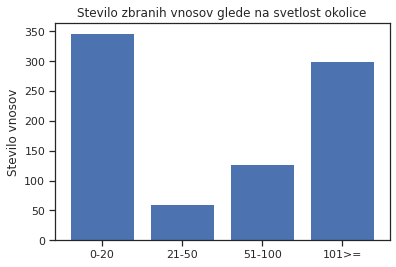

In [53]:
c0 = sum(0 <= x<= 20 for x in data_frame["env brightness"])
c1 = sum(21 <= x <= 50 for x in data_frame["env brightness"])
c2 = sum(51 <= x <= 100 for x in data_frame["env brightness"])
c3 = sum(x >= 101 for x in data_frame["env brightness"])

draw_pie(['0-20', '21-50','51-100', '101>='], [c0, c1, c2, c3])
izrisi_svetlost_okolice([c0, c1, c2, c3])

Top frequencies

0     160
13     20
8      15
16     12
2      12
Name: env brightness, dtype: int64



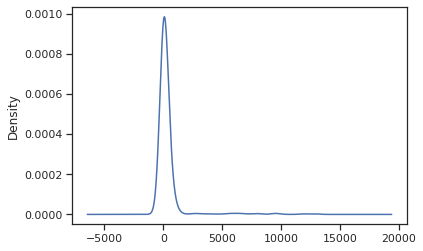

{'skewness': 6.452698388096612,
 'kurtosis': 44.90664495782711,
 'std': 1360.1202326894802,
 'variance': 1849927.0473712857,
 'modus': 0,
 'mean': 355.1674641148325,
 'median': 54.5,
 'minimum': 0,
 'maximum': 12918,
 'range': 12918}

In [54]:
ana_cont_var("env brightness")

Visoka vrednost parametra 'kurtosis' grafa nakazuje, da imamo veliko ekstremnih primerov, saj senzorji telefona dajejo visoke vrednosti svetlosti okolice. Prav tako pa moramo upoštevati, da je takih vnosov, kjer uporabnik hodi ali pa je v stanju vožnjo veliko manjše od tistih, kjer je uporabnik pri miru. 

Visoka vrednost parametra 'skewness' pa nakazuje, da je graf premaknjen v levo, kar pomeni, da je večina vrednosti majhna. 

#### Uporaba aplikacija glede na svetlost zaslona

Svetlost ekrana predstavljajo celoštevilkse vrednosti med 0 in 255, ki jih bomo razdelili na 2 intervala.

In [55]:
def izrisi_svetlost_zaslona(vals):
    print(vals)
    labels = ('0-127', '128>=')
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, vals, align='center')
    plt.xticks(y_pos, labels)
    plt.ylabel('Stevilo vnosov')
    plt.title('Stevilo zbranih vnosov glede na svetlost zaslona')
    plt.show()

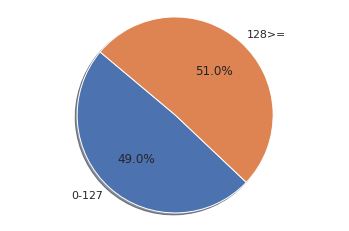

[410, 426]


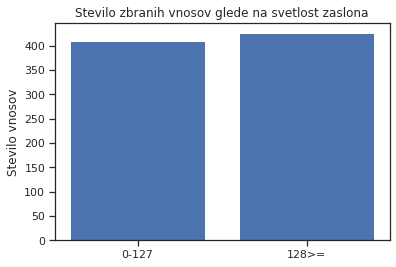

In [56]:
c0 = sum(0 <= x<= 127 for x in data_frame["screen brightness"])
c1 = sum(x >= 128 for x in data_frame["screen brightness"])

draw_pie(['0-127','128>='], [c0, c1])
izrisi_svetlost_zaslona([c0,c1])

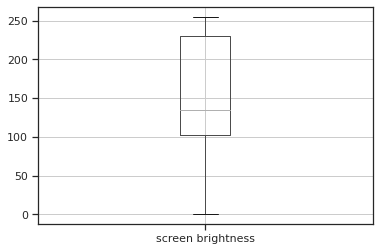

Top frequencies

230    215
125    107
103     85
255     58
147     56
Name: screen brightness, dtype: int64



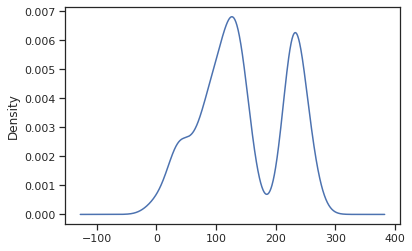

{'skewness': 0.05554500290948183,
 'kurtosis': -1.135149873079983,
 'std': 71.33345296496182,
 'variance': 5088.46151190442,
 'modus': 230,
 'mean': 145.27153110047846,
 'median': 135.0,
 'minimum': 0,
 'maximum': 255,
 'range': 255}

In [57]:
ana_cont_var("screen brightness", b_plot=True)

#### Uporaba aplikacija glede na moč internetne povezave

Eden izmed parametrov konteksta je tudi moč internetne povezave, ki lahko zavezam celoštevilske vrednosti med 0 in 2 (0 - najslabši signal 2-najboljši).

V primeru WIFI signala se hitrost internetne povezave izračuna s pomočjo mere RSSI (Received Signal Strength Indicator), ki predstavlja moč signala med mobilno napravo in dostopno točko.

V Androidu imamo na voljo metodo ```calculateSignalLevel(wifiInfo.getRssi(), numberOfLevels);```, iz razreda ```WifiManager```, ki na podlagi RSSI mere pove, v katero kategorijo sodi dana povezava.

V primeru mobilnih podatkov pa preverimo tip omrežja, pri tem razlikjemo med:

* 2G - slaba internetna povezava (zavzema vrednost 0)
* 3G - srednje dobra moč povezave (zavzema vrednost 1)
* 4G - dobra internetna povezava (zavzema vrednost 2)

Največ vnosov je takih, ki imajo srednje dobro ali pa odlično internetno povezavo

In [58]:
def izrisi_moc_internetne_povezave(vals):
    print(vals)
    labels = ('0', '1','2')
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, vals, align='center')
    plt.xticks(y_pos, labels)
    plt.ylabel('Stevilo vnosov')
    plt.title('Stevilo zbranih vnosov glede na moc internetne povezave')
    plt.show()

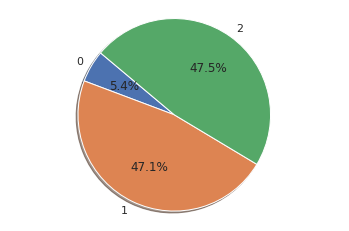

[45, 394, 397]


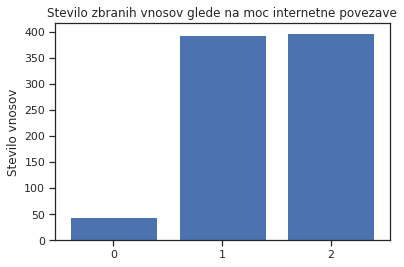

In [59]:
c0 = sum(x == 0 for x in data_frame['internet speed'])
c1 = sum(x == 1 for x in data_frame['internet speed'])
c2 = sum(x == 2 for x in data_frame['internet speed'])

draw_pie(['0','1', '2'], [c0, c1, c2])
izrisi_moc_internetne_povezave([c0,c1, c2])

Na spodnji sliki lahko tudi opazimo, da so uporabniki raznolike ocene dajali, ko so imeli največjo hitrost internetne povezave (kar danes večinoma ljudje imajo). Odgovori so pozitivni, kjer imajo uporabniki slabši nivo internetne povezave, vendar na tem mestu moramo omeniti, da imamo zelo majhno število vnosov, kjer je vrednost internetne povezave enaka 0 (le 45)

Če v jeziku R poskusimo napovedovati vrednosti izhoda sistema (skupaj seštete ocene posameznih kategorij) na sledeč način:

1. model = lm(score ~ internet.speed, data=data)
2. summary(model)

dobimo p vrednosti, ki so manjše kot kot 0.0029, kar pomeni, da moramo zavreči ničelno hipotezo. Torej lahko sklepamo, da hitrost interne povezave uporabnika vpliva na skupno oceno prikaza novic.

![title](img/is_ocena.png)

#### Uporaba aplikacija glede na nivo baterije

Moč baterije zavzema vrednosti med 0 in 100. Spodnji grafi podajajo delež vnosov, glede na moč baterije razporejen na tri intervale.

Izkaže se, da so uporabniki aplikacijo največ uporabljali, ko so imeli več kot 61% baterije.

In [38]:
def izrisi_moc_baterije(vals):
    print(vals)
    labels = ('0-30', '31-60','>=61')
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, vals, align='center')
    plt.xticks(y_pos, labels)
    plt.ylabel('Stevilo vnosov')
    plt.title('Stevilo zbranih vnosov glede na moc batrije')
    plt.show()

[112, 261, 463]


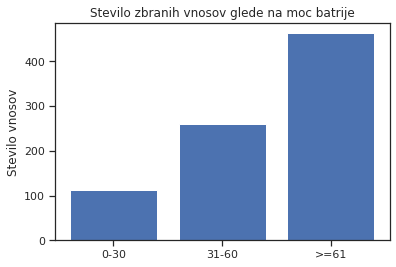

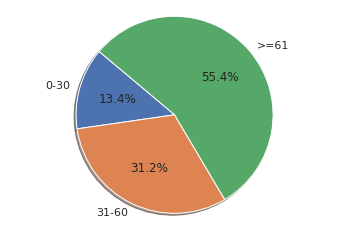

In [39]:
c0 = sum(0 <= x<= 30 for x in data_frame["battery level"])
c1 = sum(31 <= x <= 60 for x in data_frame["battery level"])
c2 = sum(x >= 61 for x in data_frame["battery level"])

izrisi_moc_baterije([c0,c1, c2])
draw_pie(['0-30','31-60', '>=61'], [c0, c1, c2])

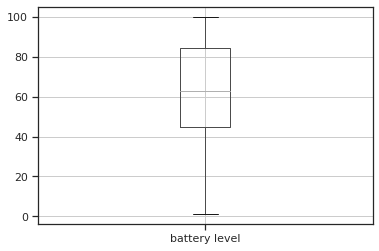

Top frequencies

87    68
63    29
86    25
56    23
55    23
Name: battery level, dtype: int64



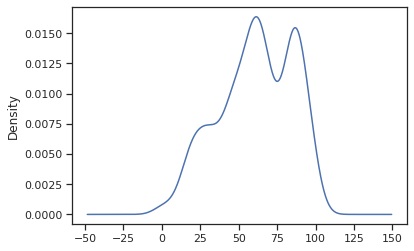

{'skewness': -0.3698235041983726,
 'kurtosis': -0.7413654871154938,
 'std': 23.840392217053516,
 'variance': 568.3643010629459,
 'modus': 87,
 'mean': 61.25837320574163,
 'median': 63.0,
 'minimum': 1,
 'maximum': 100,
 'range': 99}

In [40]:
ana_cont_var("battery level", b_plot=True)

### Korelacijska matrika parametrov 

Spodnja mreža prikazuje zveze med pari parametrov konteksta. Metoda associations iz knjižnice dython deluje po sledečem principu:

* korelacija med zveznimi spremenljivkami, se izračuna s pomočjo [Pearsonovega koeficiena korelacije](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) in lahko zajema vrednosti med -1 in 1. Vrednosti, ki so blizu 0 pomenijo, da korelacije ni.  
* korelacija med nominalnimi spremenljivkami se lahko izračuna s pomočjo mere [Cramér's V](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V), za katerega velja, da so vrednosti simtrične, kar pomeni, da je V(x,y)=V(y,x), pri čemer je V predstavlja Cramer’s V x,y pa spremenljivki za katere proučujemo vpliv. Kot alternativo imamo na voljo [Theil’s U](https://en.wikipedia.org/wiki/Uncertainty_coefficient) koeficient nedoločenosti, ki računa asociacijo s pomočjo entropije, zato ga bomo tudi uporabili v spodnji analizi.
* korelacije med zvezno in nominalno spremenljivko pa lahko izračunamo s pomočjo [korelacijskega razmerja](https://en.wikipedia.org/wiki/Correlation_ratio), ki se izračuna kot koeficient varianc celotne populacije in varianc znotraj posameznih skupin.

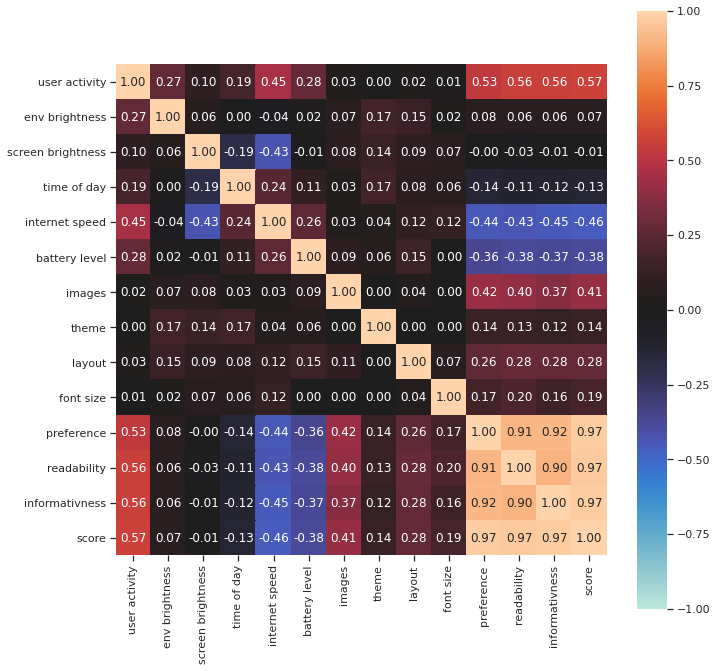

In [45]:
corr, ax = nominal.associations(data_frame, nominal_columns=['user activity', 'images', 'theme', 'layout', 'font size'], figsize=(11,11), theil_u=True)